In [22]:
import os

file_path = r"D:\Abdul\ex-2\Crude oil.csv"

if os.path.exists(file_path):
    print("File exists!")
else:
    print("File not found. Check the path.")


File exists!


In [24]:
import pandas as pd

file_path = r"D:\Abdul\ex-2\Crude oil.csv"

# Read the CSV without parsing dates
df = pd.read_csv(file_path)

# Print first few rows and column names
print(df.head())
print("\nColumn names:", df.columns.tolist())


         Date  Close/Last    Volume   Open   High    Low
0  10/28/2022       87.90  241417.0  88.67  88.76  87.08
1  10/27/2022       88.26  273717.0  88.26  89.79  87.33
2  10/26/2022       87.91  271474.0  85.07  88.41  84.14
3  10/25/2022       85.32  226337.0  84.88  86.03  83.06
4  10/24/2022       84.58  238458.0  85.24  85.92  82.63

Column names: ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']


In [26]:
df = pd.read_csv(file_path, parse_dates=['Correct_Date_Column'])
df.set_index('Correct_Date_Column', inplace=True)
print(df.head())


ValueError: Missing column provided to 'parse_dates': 'Correct_Date_Column'

In [28]:

import pandas as pd

file_path = r"D:\Abdul\ex-2\Crude oil.csv"

# Read CSV without parsing dates
df = pd.read_csv(file_path)

# Print the first few rows and column names
print(df.head())
print("\nColumn names:", df.columns.tolist())


         Date  Close/Last    Volume   Open   High    Low
0  10/28/2022       87.90  241417.0  88.67  88.76  87.08
1  10/27/2022       88.26  273717.0  88.26  89.79  87.33
2  10/26/2022       87.91  271474.0  85.07  88.41  84.14
3  10/25/2022       85.32  226337.0  84.88  86.03  83.06
4  10/24/2022       84.58  238458.0  85.24  85.92  82.63

Column names: ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']


In [30]:
import pandas as pd

file_path = r"D:\Abdul\ex-2\Crude oil.csv"

# Read CSV with correct date parsing
df = pd.read_csv(file_path, parse_dates=['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

print(df.head())  # Verify output


            Close/Last    Volume   Open   High    Low
Date                                                 
2022-10-28       87.90  241417.0  88.67  88.76  87.08
2022-10-27       88.26  273717.0  88.26  89.79  87.33
2022-10-26       87.91  271474.0  85.07  88.41  84.14
2022-10-25       85.32  226337.0  84.88  86.03  83.06
2022-10-24       84.58  238458.0  85.24  85.92  82.63


In [32]:
df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=False)  # Default is False (MM/DD/YYYY)


In [34]:
df.rename(columns={'Close/Last': 'Close'}, inplace=True)


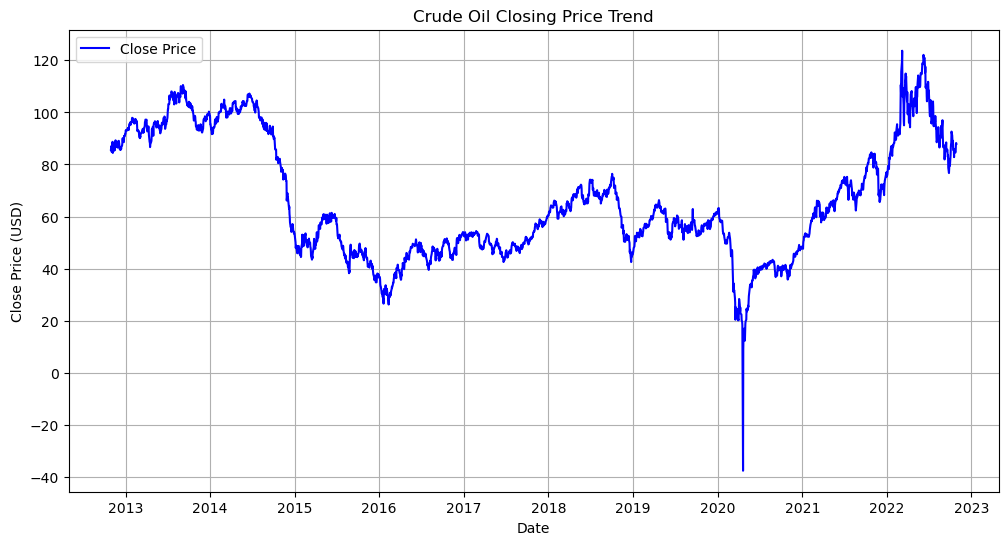

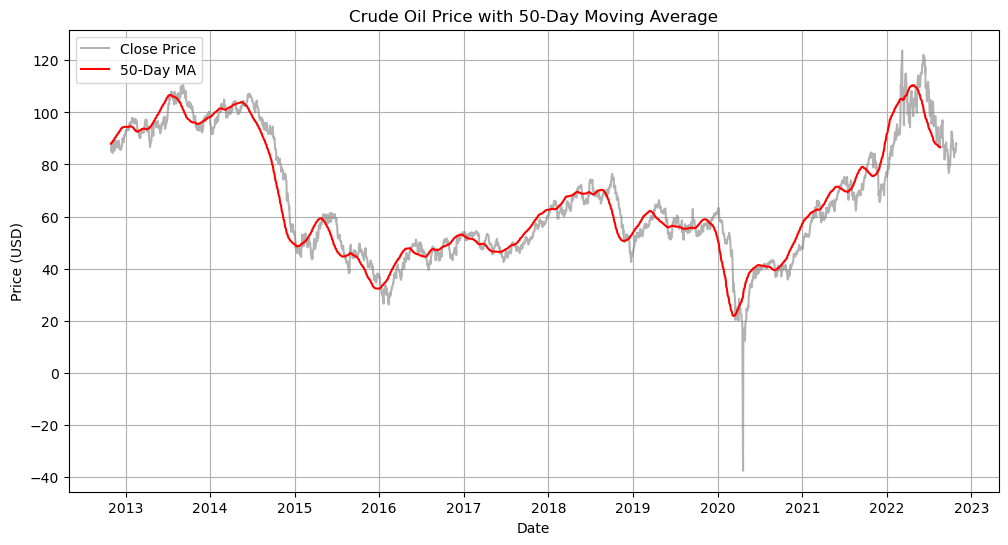

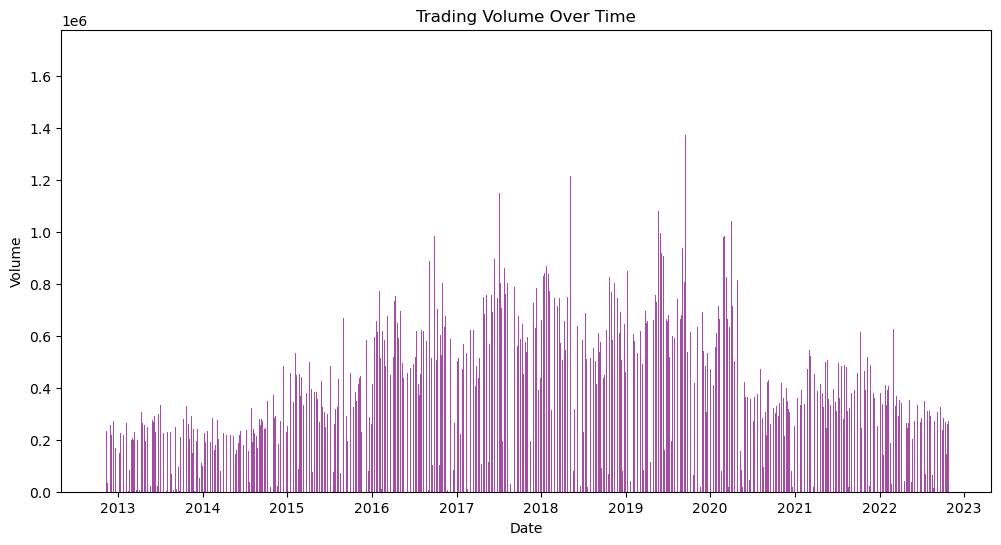

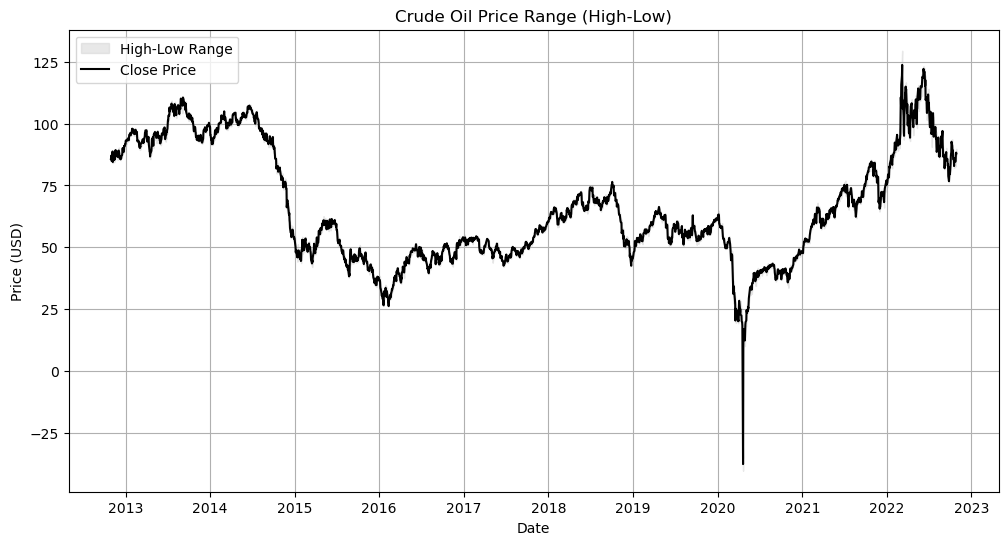

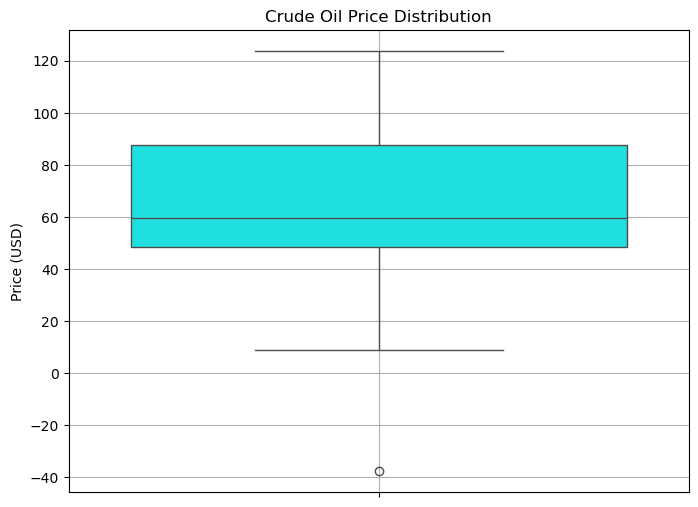

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"D:\Abdul\ex-2\Crude oil.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Convert 'Close/Last' to numeric
df.rename(columns={'Close/Last': 'Close'}, inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# 1️⃣ Line Chart - Price Trend Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Crude Oil Closing Price Trend")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Moving Average (50-day)
df['50_MA'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='gray', alpha=0.6)
plt.plot(df.index, df['50_MA'], label='50-Day MA', color='red')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Crude Oil Price with 50-Day Moving Average")
plt.legend()
plt.grid()
plt.show()

# 3️⃣ Bar Chart - Trading Volume
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='purple', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume Over Time")
plt.show()

# 4️⃣ High-Low Range (Shaded Area)
plt.figure(figsize=(12, 6))
plt.fill_between(df.index, df['Low'], df['High'], color='lightgray', alpha=0.5, label='High-Low Range')
plt.plot(df.index, df['Close'], label='Close Price', color='black')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Crude Oil Price Range (High-Low)")
plt.legend()
plt.grid()
plt.show()

# 5️⃣ Box Plot - Price Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Close'], color='cyan')
plt.ylabel("Price (USD)")
plt.title("Crude Oil Price Distribution")
plt.grid()
plt.show()
